In [25]:
import ect
from ect_optim import ECTFilterOptimizer
import matplotlib.pyplot as plt
import numpy as np
import cv2

radius = 200
img_offset = radius/10
ect_offset = radius/5

n_knots = 20

In [26]:
def rms(x: np.ndarray) -> float:
    rms_ = np.sqrt((x*np.conj(x)).sum().sum())
    return rms_

def rmsnorm(x: np.ndarray) -> np.ndarray:
    rms = np.sqrt((x*np.conj(x)).sum().sum())
    return np.abs(x)/rms

def snr(image: cv2.Mat, template: cv2.Mat):
    snr_lin = (1/rms((rmsnorm(image) - rmsnorm(template))))
    return 20*np.log10(snr_lin)

In [27]:
opt = ECTFilterOptimizer(
    image_path = "../sample_imgs/white.png",
    radius = radius,
    n_knots = n_knots,
    img_offset = img_offset,
    ect_offset = ect_offset,
    loss_fcn = lambda x, y: -snr(x, y),
    do_snf=False
)

result = opt.optim()
# result = opt.optim(method = "Nelder-Mead")
# solution = result['x'][0]


Current loss=-18.453
Current loss=-19.313
Current loss=-19.569
Current loss=-19.988
Current loss=-20.522
Current loss=-20.628
Current loss=-20.701
Current loss=-20.729
Current loss=-20.754
Current loss=-20.792
Current loss=-20.839
Current loss=-20.864
Current loss=-20.887
Current loss=-20.899
Current loss=-20.909
Current loss=-20.917
Current loss=-20.931
Current loss=-20.954
Current loss=-20.996
Current loss=-21.072
Current loss=-21.160
Current loss=-21.285
Current loss=-21.416
Current loss=-21.537
Current loss=-21.576
Current loss=-21.597
Current loss=-21.614
Current loss=-21.619
Current loss=-21.626
Current loss=-21.634
Current loss=-21.646
Current loss=-21.659
Current loss=-21.677
Current loss=-21.682
Current loss=-21.684
Current loss=-21.685
Current loss=-21.686
Current loss=-21.686
Current loss=-21.687
Current loss=-21.687
Current loss=-21.687
Current loss=-21.687
Current loss=-21.687
Current loss=-21.687
Current loss=-21.688
Current loss=-21.688
Current loss=-21.688
Current loss=

In [28]:
result

      fun: -21.69352471867635
 hess_inv: array([[ 5.70598567e+00, -2.40566963e-01,  1.47369686e+00,
         9.36934200e-01,  1.46489778e+00,  1.60835858e+00,
         7.06960358e-01,  6.16918022e-01,  5.54327465e-01,
         5.88531348e-01,  6.00527171e-01,  5.93678924e-01,
         5.75100458e-01,  5.85186752e-01,  5.97781230e-01,
         7.13190302e-01,  6.46896122e-01,  2.17782901e-01,
        -1.27666105e+01, -1.01972835e+02],
       [-2.40566963e-01,  9.50705030e+00, -7.16335210e-01,
         1.44268153e+00, -1.31194749e-01, -6.54943427e-01,
         4.72501205e-01,  6.32703016e-01,  6.41693695e-01,
         5.83713590e-01,  5.96854032e-01,  5.91892180e-01,
         5.33105924e-01,  5.73115006e-01,  5.84129589e-01,
         3.72304484e-01,  6.68811539e-01,  2.40272296e-01,
         1.18973152e+01,  1.01984249e+02],
       [ 1.47369686e+00, -7.16335210e-01,  9.79872190e+00,
         2.04715673e-01,  2.01091097e+00,  1.03805575e+00,
         6.28012275e-01,  5.05374933e-01,  4.78

opt.loss(solution)=-21.69352471867635


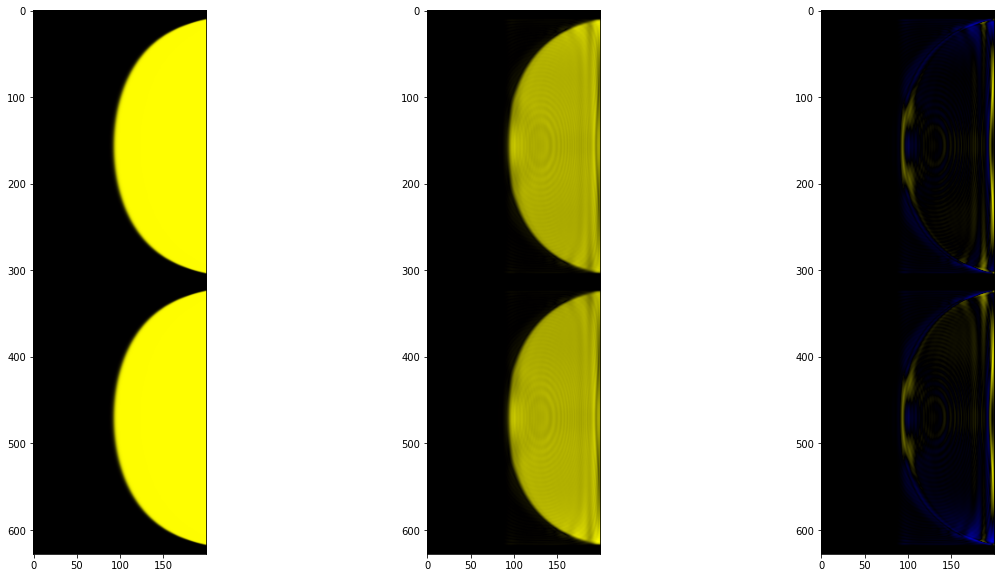

In [29]:
solution = result['x']

opt.show_result(rmsnorm)

print(f"{opt.loss(solution)=}")
# print(f"{opt.loss_sidelobe(solution)=}")

In [30]:
res = opt.inv

knots_freq = solution
# knots_space = solution[n_knots:]

fnf = ect.freqnorm(res.shape[:2], radius, knots_freq)
# snf = ect.spacenorm(res.shape[:2], radius, knots_space)

print(f"{knots_freq=}")

knots_freq=array([ -0.61092331,  -1.00966427,  -1.37491904,  -1.80655327,
        -1.94547781,  -1.927422  ,  -1.84498904,  -1.79040401,
        -1.77814058,  -1.78805901,  -1.87300381,  -2.01044537,
        -2.08312042,  -2.06715938,  -2.03993975,  -2.02123538,
        -1.96039793,  -2.04295976,  -4.53988229, -14.49441173])


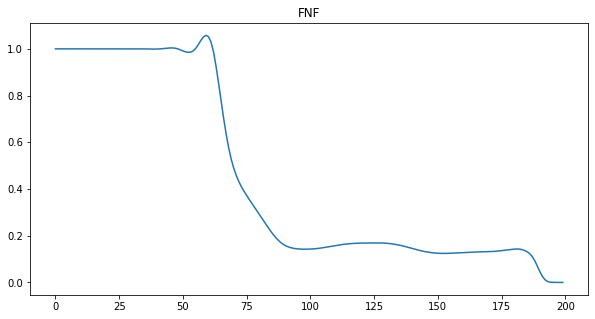

In [31]:
plt.figure(figsize=(10, 5))

# plt.subplot(1, 2, 1)
plt.title("FNF")
plt.plot(fnf[0,:])

# plt.subplot(1, 2, 2)
# plt.title("SNF")
# plt.plot(snf[0,:])

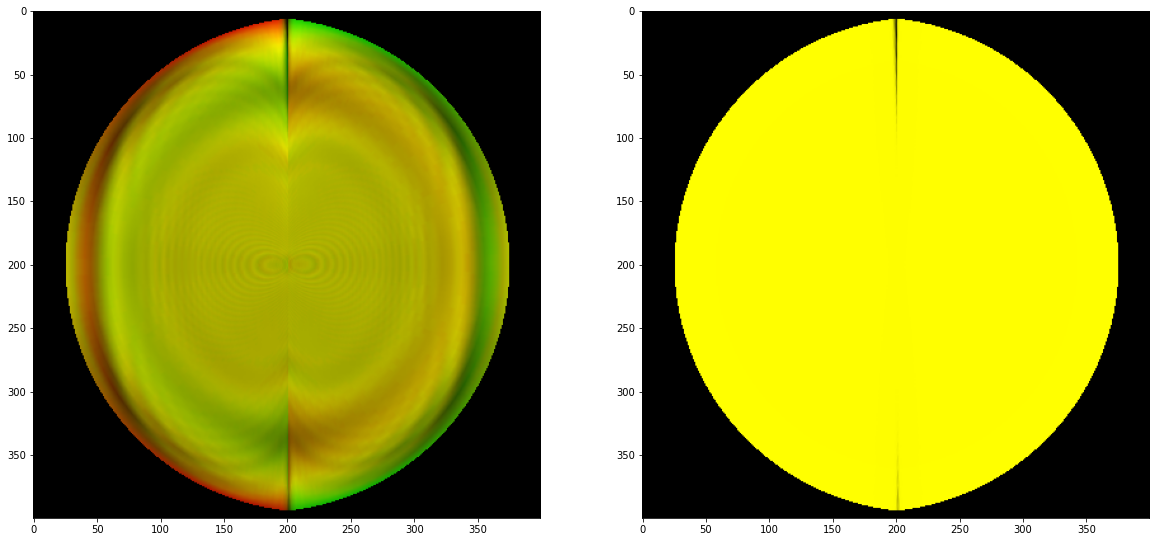

In [32]:
inv_img = ect.ilogpolar(ect.complex_to_hsv(opt.inv), radius=radius, offset=img_offset)
src_img = ect.ilogpolar(ect.complex_to_hsv(opt.image), radius=radius, offset=img_offset)

plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
plt.imshow(inv_img)

plt.subplot(1, 2, 2)
plt.imshow(src_img)